# 10/1: Neural Networks

Hi everyone! In this notebook we'll be looking at Neural Networks and their applications in Machine Learning and Natural Language Processing

To complete this notebook, we have the following methods for you to complete:

1. `sigmoid()`
2. `sigmoid_derivative()`
3. `forward_prop()`
4. `back_prop()`

We'll start by building neural networks to decide if two boolean inputs are equivalent, and then extend it to recognizing handwritten digits!

In [1]:
import numpy as np

## Part 1: Sigmoid and the Derivative of Sigmoid

The sigmoid function and its derivative are essential for the functionality of neural networks. To start, complete the function `sigmoid()`

Recall from a couple of weeks ago that the formula for `sigmoid()` is:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;\large&space;\frac{1}{1&space;&plus;&space;e^{-x}}" title="\large \frac{1}{1 + e^{-x}}" />

In [2]:
def sigmoid(x):
    # calculate the output of the sigmoid function and return it
    sigmoid_val = 1 / (1 + np.exp(-x))
    return sigmoid_val

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint</b></font>
</summary>
<p>
<ul>
    <li>Try to use numpy functions! You'll find <code>np.exp()</code>very useful</li>
</ul>
</p>

In [3]:
# run this cell to test sigmoid
if (sigmoid(0) == 0.5 and sigmoid(3.1415) == 0.9585724885979936):
    print("Correct value for sigmoid!")
else:
    print("I think you gotta fix that pal")

Correct value for sigmoid!


Next we'll calculate the derivative of `sigmoid()` in the function `sigmoid_derivative()`. The derivative of `sigmoid()` is:

<img src="https://latex.codecogs.com/gif.latex?\dpi{150}&space;\large&space;\newline&space;=&space;\frac{d}{dx}\frac{1}{1&space;&plus;&space;e^{-x}}&space;\newline&space;\newline&space;=&space;-1&space;(1&space;&plus;&space;e^{-x})^{-2}&space;\newline&space;\newline&space;=&space;sigmoid(x)&space;*&space;(1&space;-&space;sigmoid(x))" title="\large \newline = \frac{d}{dx}\frac{1}{1 + e^{-x}} \newline \newline = -1 (1 + e^{-x})^{-2} \newline \newline = sigmoid(x) * (1 - sigmoid(x))" />

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints</b></font>
</summary>
<p>
<ul>
    <li>You don't have to recode the formula for <code>sigmoid()</code>. Simply use the <code>sigmoid()</code> function in the earlier cell</li>
    <li>You might find <code>np.multiply()</code> very useful</li>
</ul>
</p>

In [4]:
def sigmoid_derivative(x):
    # calculate the derivative and return the value
    sigmoid_deriv = np.multiply(sigmoid(x), 1 - sigmoid(x))
    return sigmoid_deriv

In [5]:
# run this cell to check your derivative of sigmoid
if (sigmoid_derivative(0) == 0.25 and sigmoid_derivative(3.1415) == 0.03971127270104303):
    print("Good job!")
else:
    print("bad bad job >:(")

Good job!


## Part 2: Creating our Neural Network Methods

Our neural network system depends on two main functions:
1. `Forward Propogation`
2. `Back Propogation`

We'll start by implementing `forward_prop()` for our neural network

You will need to complete the following steps in the method:

1. Set `ones_col` equal to the correctly-sized matrix of ones
2. Calculate `pred_val` from `formatted_inputs` and `theta`
3. Set `curr_inputs` to the `sigmoid()` of `pred_val`

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 1</b></font>
</summary>
<p>
<ul>
    <li>Use <code>np.ones((..., ...)</code>to generate this matrix</li>
    <li>The dimensions of <code>ones_col</code> should be <code>(m, 1)</code></li>  
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 2</b></font>
</summary>
<p>
<ul>
    <li><code>pred_val</code> is found by using matrix multiplication (<code>@</code>) with <code>formatted_inputs</code> and <code>theta</code></li>
    <li>Make sure you're using the right dimensions! You need to specifically multiply <code>formatted_inputs</code> and <code>theta.T</code> </li>  
</ul>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 3</b></font>
</summary>
<p>
<ul>
    <li>The instructions are in the step! Let <code>curr_inputs = sigmoid(pred_val)</code></li>  
</ul>
</p>

In [6]:
def forward_prop(inputs, thetas, m):
    # declare the values we need
    outputs = []
    curr_inputs = inputs
    ones_col = np.ones((m, 1))
    for theta in thetas:
        # format the inputs by adding the column of ones
        formatted_inputs = np.hstack((ones_col, curr_inputs))
        # calculate the predicted value, and append it to the list of outputs
        pred_val = formatted_inputs @ theta.T
        outputs.append(pred_val)
        # set curr_inputs to the the sigmoid of our predicted value
        curr_inputs = sigmoid(pred_val)
    # return our list of outputs
    return outputs

In [7]:
# run this cell to test your implementation of forward_prop
np.random.seed(123456789)
test_thetas = [np.random.random((2, 3)), np.random.random((1, 3))]
test_inputs = np.random.random((4, 2))

test_forward_prop = forward_prop(test_inputs, test_thetas, 4)
correct_forward_prop_val = [np.array([[1.24524706, 1.42359831], [1.34984787, 1.52210102], [0.58694045, 0.74140142], [0.66236153, 0.78210622]]), np.array([[1.54454925], [1.55730176], [1.43758967], [1.44616478]])]

if not (test_forward_prop[0] - correct_forward_prop_val[0]).all():
    print("Your first layer values are incorrect, sport")
elif not (test_forward_prop[1] - correct_forward_prop_val[1]).all():
    print("Your second layer values are incorrect, ace")
else:
    print("You did it, champ!")

You did it, champ!


The next method, `back_prop()` is an absolute banger, but easily the most important for neural networks to function. This method will take the derivative of each layer and then compute the gradients for each set of thetas

You will need to complete the following steps:
1. Calculate `diff3`, the difference of the `sigmoid()` of the last entry of `y_predictions`, and `y_actual`
2. Calculate `diff2`, the multiplication of `diff2_unadjusted` and the `sigmoid_derivative()` of the first entry of 
`y_predictions`
3. Calulate `delta_one`, the matrix multiplication of `diff2` and `format_partial_one` (Note the dimensions!)
4. Calulate `delta_two`, the matrix multiplication of `diff3` and `format_partial_two` (Note the dimensions!)

This method is fairly difficult to complete, so within every hint, you have the option to see the solution for the step

Note: Unlike `forward_prop()`, this method is very difficult to code so that it works for any-sized neural network. Hence, we will hard code it with the assumption that there are 2 layers for our network

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hint for Step 1</b></font>
</summary>
<p>
<ul>
    <li>The last entry of <code>y_predictions</code> is <code>y_predictions[-1]</code></li>  
</ul>
    <details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution for Step 1</b></font>
</summary>
<p>
<ul>
    Set <code>diff3 = sigmoid(y_predictions[-1]) - y_actual</code>
</ul>
</p>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 2</b></font>
</summary>
<p>
<ul>
    <li>You will need <code>np.multiply()</code> to multiply the two values</li>  
    <li>The first value to multiply should be <code>diff2_unadjusted</code></li> 
    <li>The second value to multiply should be <code>sigmoid_derivative(y_predictions[0])</code></li> 
</ul>
    <details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution for Step 2</b></font>
</summary>
<p>
<ul>
    Set <code>diff2 = np.multiply(diff2_unadjusted, sigmoid_derivative(y_predictions[0]))</code>
</ul>
</p>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 3</b></font>
</summary>
<p>
<ul>
    <li>Use <code>@</code>, <b>NOT</b> <code>np.multiply()</code></li>  
    <li>You need to multiply <code>diff2.T</code> and <code>format_partial_one</code></li> 
</ul>
    <details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution for Step 3</b></font>
</summary>
<p>
<ul>
    Set <code>delta_one = diff2.T @ format_partial_one</code>
</ul>
</p>
</p>

<details>    
<summary>
    <font size="3" color="darkgreen"><b>Hints for Step 4</b></font>
</summary>
<p>
<ul>
    <li>This step is almost identical to step 2!</li>  
    <li>Use <code>@</code>, <b>NOT</b> <code>np.multiply()</code></li>  
    <li>You need to multiply <code>diff3.T</code> and <code>format_partial_two</code></li> 
</ul>
    <details>    
<summary>
    <font size="3" color="darkgreen"><b>Solution for Step 4</b></font>
</summary>
<p>
<ul>
    Set <code>delta_two = diff3.T @ format_partial_two</code>
</ul>
</p>
</p>

In [8]:
def back_prop(y_predictions, y_actual, inputs, thetas, m, num_classifications):
    # sets the constant for ones_col
    ones_col = np.ones((m, 1))
    
    # adjusts the value of actual_val if there are more than 2 classifications
    if (num_classifications > 2):
        y_actual = (np.eye(num_classifications))[y_actual]
    
    # calculates the "difference" for the final layer
    diff3 = sigmoid(y_predictions[-1]) - y_actual
    
    # calculates the "difference" for the penultimate layer
    diff2_unadjusted = diff3 @ thetas[1][:, 1:]
    diff2 = np.multiply(diff2_unadjusted, sigmoid_derivative(y_predictions[0]))
    
    # formats the partial derivatives
    format_partial_one = np.hstack((ones_col, np.asarray(inputs)))
    format_partial_two = np.hstack((ones_col, np.asarray(sigmoid(y_predictions[0]))))
    
    # calculates the unadjusted partial derivatives
    delta_one = diff2.T @ format_partial_one
    delta_two = diff3.T @ format_partial_two
    
    # returns our partial derivatives
    return [delta_one / m, delta_two / m]

In [9]:
# run this cell to test back_prop
np.random.seed(123456789)

test_thetas = [np.random.random((2, 3)), np.random.random((1, 3))]
test_inputs = np.random.random((4, 2))
test_y_actual = np.random.random((4, 1))

test_back_prop = back_prop(test_forward_prop, test_y_actual, test_inputs, test_thetas, 4, 2)
correct_back_prop = [np.array([[0.00907003, 0.0054814 , 0.00563069], [0.03581553, 0.02146392, 0.021947  ]]), np.array([[0.33095398, 0.25353556, 0.26271239]])]

if not (test_back_prop[0] - correct_back_prop[0]).any():
    print("Homie, your first partial derivative is wrong")
elif not (test_back_prop[1] - correct_back_prop[1]).any():
    print("Oh no no your second partial derivative is wrong")
else:
    print("I can't believe you actually did it you're insane!")

I can't believe you actually did it you're insane!


## Part 3: Using our Neural Network Architecture

### Note: You don't have to code for the rest of the notebook! You can relax and watch your hard work pay off

Now that we have the two needed functions for neural networks, we can start predicting stuff!

We'll start by predicting the `xnor` operator, which essentially checks if two boolean inputs are equivalent

We can use the following truth table to describe `xnor`:


| a | b | out |
| - | - | --- |
| 1 | 1 |  1  |
| 1 | 0 |  0  |
| 0 | 1 |  0  |
| 0 | 0 |  1  |

The picture below represents our neural network architecture:

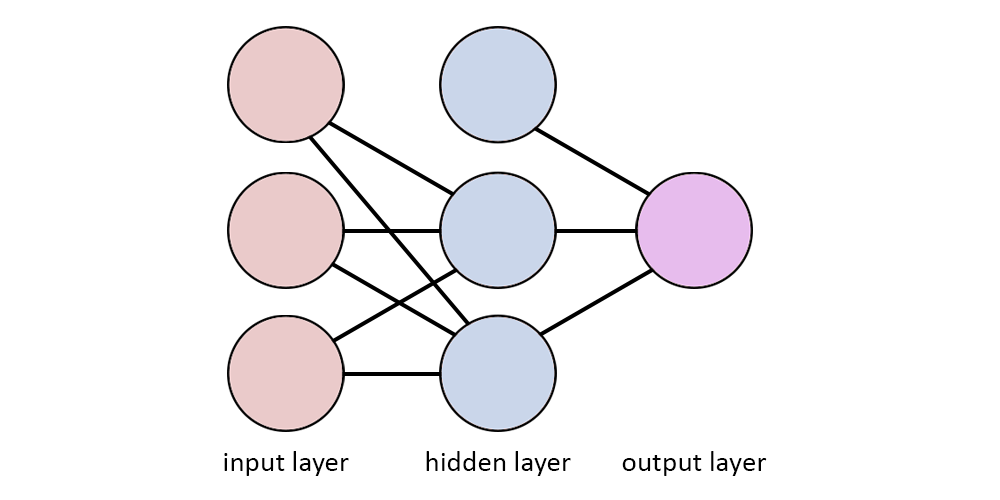

In [10]:
from IPython.display import Image
Image(filename = "./xnor.png", width=800, height=800)

First, we need to define our inputs and outputs, as well as our values for theta

In [11]:
# defining inputs and outputs
xnor_inputs = np.array([[1, 1, 0, 0], [1, 0, 1, 0]]).T
xnor_outputs = np.array([[1, 0, 0, 1]]).T

In [12]:
# defining theta values with correct dimensions
xnor_thetas = [np.random.random((2, 3)), np.random.random((1, 3))]

Next, I'll define constants for our gradient descent algorithm

You might notice that `learning_rate` $ > 1$ Why?

This is undoubtably because I messed up my code somewhere but I have no idea why this happens. All I know is that this is the value that makes gradient descent work

It probably has to do with the fact that the sample size is so small, so we need to converge much quicker than normal

In [13]:
# defining constants
sample_size = xnor_inputs.shape[0]
num_classifications = 2
learning_rate = 5
num_iterations = 10000

Finally, we can run gradient descent for our algorithm

In [14]:
# gradient descent
for iteration in range(num_iterations):
    # calculate the outputs for the iteration
    outputs = forward_prop(xnor_inputs, xnor_thetas, sample_size)
    # calculate the gradients for the iteration
    gradients = back_prop(outputs, xnor_outputs, xnor_inputs, xnor_thetas, sample_size, num_classifications)
    # adjust both of our thetas, taking a small step towards the minimum
    xnor_thetas[0] = xnor_thetas[0] - learning_rate * gradients[0]
    xnor_thetas[1] = xnor_thetas[1] - learning_rate * gradients[1]

In [15]:
# run this cell to check your code!
print("Inputs:")
print(str(xnor_inputs))
print("--------")
print("Outputs (rounded):")
print(str(np.round(sigmoid(outputs[-1]), 3)))

Inputs:
[[1 1]
 [1 0]
 [0 1]
 [0 0]]
--------
Outputs (rounded):
[[1.]
 [0.]
 [0.]
 [1.]]


Hopefully, you'll see that the outputs read

$\begin{bmatrix}1 \\ 0 \\ 0 \\ 1\end{bmatrix}$

which matches our data table!

If it does, you just successfuly created a neural network!

## Part 3b: Recognizing Handwritten Digits

Let's look at a common application of neural networks, image processing

In the following cells, we'll write code to recognize handwritten digits!

Our neural network for this scenario is a little more complex:

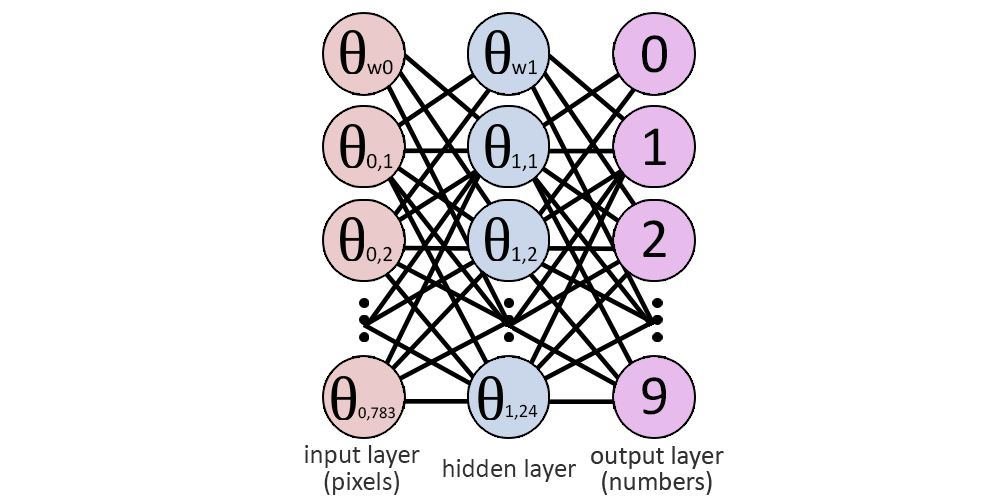

In [16]:
Image(filename = "./mnist.png", width=800, height=800)

### Note: In order to continue, you need to complete the following steps in the `Anaconda Prompt`
1. Open `Anaconda Prompt`
2. `conda install pip`
3. `pip install --upgrade tensorflow`
4. `pip install Keras`
5. `conda create -n mnist tensorflow keras`
6. `conda activate mnist`
7. `conda install jupyter`
8. `conda list` - verify that you see numpy, keras, and tensorflow
9. run `jupyter notebook` and open this file again

First, we need an additional library, `keras`, to import our `mnist` dataset

In [17]:
# importing the appropriate libraries
import keras
from keras.datasets import mnist

Using TensorFlow backend.


We'll import our testing and training sets (this might take a couple of seconds)

In [18]:
# importing the data set
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

As usual, we'll define our constants for gradient descent

In [19]:
# defining our constants
num_classifications = 10
m = 12000
learning_rate = 2.5
num_iterations = 500

We have to perform some additional calculations to transform our data:
1. Reshape our data so that each image is represented as a single array of numbers
2. Divide these numbers by 255 so the data is `normalized`

In [20]:
# reshaping and normalizing the inputs to fit our needs
mnist_train_inputs = (mnist_x_train[0:m][:][:].reshape(m, 28*28)) / 255
mnist_train_outputs = mnist_y_train[0:m]

mnist_test_inputs = (mnist_x_test[:][:][:].reshape(mnist_x_test.shape[0], 28*28)) / 255
mnist_test_outputs = mnist_y_test

We'll define our thetas with the correct dimensions, randomizing them to avoid `computational symmetry`

In [21]:
# defining theta values with correct dimensions
theta_one = np.matrix(np.random.random((25, 785))) - 0.5
theta_two = np.matrix(np.random.random((10, 26))) - 0.5
mnist_thetas = [theta_one, theta_two]

To save time, we're only using **20%** of the datset, and only iterating **500** times

If we had more time and computational power, we could use our neural network with 100% of the datset and many many more iterations

### Note: This cell might take ~ 1 to 3 min to run

In [22]:
# gradient descent
for iteration in range(num_iterations):
    # calculate our outputs
    outputs = forward_prop(mnist_train_inputs, mnist_thetas, m)
    # calculate the gradients
    gradients = back_prop(outputs, mnist_train_outputs, mnist_train_inputs, mnist_thetas, m, num_classifications)
    # adjust our thetas accordingly
    mnist_thetas[0] = mnist_thetas[0] - learning_rate * gradients[0]
    mnist_thetas[1] = mnist_thetas[1] - learning_rate * gradients[1]

Now that our model is trained, let's its accuracy with the training set

In [23]:
# forward propogate to get our predicted values
predicted_train_outputs = np.argmax(sigmoid(outputs[-1]), axis = 1)
num_correct_labels = np.sum(np.diagonal(predicted_train_outputs == mnist_train_outputs))

print(str(num_correct_labels) + " out of " + str(predicted_train_outputs.size) + " images were identified correctly in training")
print("This is about " + str(round(100 * (num_correct_labels / predicted_train_outputs.size), 5)) + "%")

11937 out of 12000 images were identified correctly in training
This is about 99.475%


It's good that our model can predict values in the training set, but the accuracy of the test set is much more important. If we show the computer every possible image, it could simply "memorize" the inputs and then "predict" the correct output

In [24]:
# predict our test values
test_predictions = sigmoid((forward_prop(mnist_test_inputs, mnist_thetas, mnist_x_test.shape[0]))[-1])
# get the number by finding the max value
predicted_test_output_labels = np.argmax(test_predictions, axis = 1)
# add the number that are correct
num_correct_test_labels = np.sum(np.diagonal(predicted_test_output_labels == mnist_test_outputs))

print(str(num_correct_test_labels) + " out of " + str(predicted_test_output_labels.size) + " images were identified correctly in testing")
print("This is about " + str(round(100 * (num_correct_test_labels / predicted_test_output_labels.size),4)) + "%")

9190 out of 10000 images were identified correctly in testing
This is about 91.9%


Above 90% isn't that bad! Especially since we're only using 20% of the dataset and less iterations. With more training samples and time to train, this model would be able to do a pretty good job!

## Step 4: Predicting Handwritten Digits (Visualized)

In the next cell, you'll be able to pick a random image from the testing data set and see what the computer predicts!

### Note: To run these next cells, you need to run one more command in `Anaconda Prompt` (sorry!)

1. Open `Anaconda Prompt`
2. Make sure you're in the mnist environment - `(mnist) C:\...`
3. `conda install -c anaconda pillow`

In [25]:
# imports the appropriate library
import PIL
from PIL import Image

In [26]:
def predict_num():
    # help from: https://stackoverflow.com/questions/38867869/how-to-create-image-from-numpy-float32-array
    # generates the random index from the list of test outputs
    random_index = round(mnist_test_outputs.size * np.random.random())

    # displays and formats the image correctly
    data = mnist_test_inputs[random_index].reshape(28, 28)
    formatted = (data * 255 / np.max(data)).astype('uint8')
    img = Image.fromarray(formatted)
    display(img.resize((256,256), PIL.Image.LANCZOS))

    # calculates the predction values and label for that image
    prediction_arr = np.round(sigmoid(forward_prop(np.matrix(mnist_test_inputs[random_index]), mnist_thetas, 1)[-1]), 3)
    prediction_label = np.argmax(prediction_arr)

    print("The prediction values are: " + str(prediction_arr[0]))
    print("The computer predicts this number is: " + str(prediction_label))

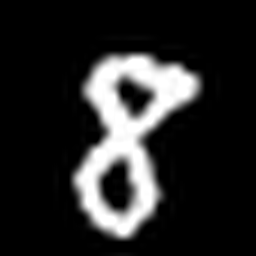

The prediction values are: [0.    0.002 0.    0.003 0.    0.    0.    0.    1.    0.   ]
The computer predicts this number is: 8


In [27]:
# keep running this cell to see the computer predict numbers!
predict_num()

You can look at the prediction values to see what the computer is thinking. The values that are higher and closer to 1 are the numbers that the computer most likely thinks the number is. Keep running the above cell to generate random numbers from the testing set!